# 21世纪巴以冲突遇难者：媒体讲述讲述的真相和数据表达的真相
- 数据来源 https://www.kaggle.com/datasets/asaniczka/fatalities-in-the-israeli-palestinian-conflict
- 数据：2000年9月29日 - 2023年9月24日
- 数据内容：自第二次起义开始以来，在以色列和被占领土上以色列和巴勒斯坦之间的冲突中丧生的个人数据。
- 这些数据基于我们对每个案例的调查。作为对每起死亡事件进行调查的一部分，我们收集了事件的目击者叙述、官方文件、照片和录像。 B’Tselem 将这些细节与其他人权组织发布的信息、以色列当局和巴勒斯坦武装组织的官方公告以及媒体报道进行了交叉核对。
- 对于大多数死亡人数，我们表明他们是否参与了敌对行动。“参与敌对行动”的定义依赖于国际人道法（IHL）的原则，这些原则随着时间的推移而发生变化。
- 2008 年之前，我们根据国际人道法原则的公认解释来确定一个人是否参与敌对行动。此后，由于普遍解释的变化，我们也将履行持续作战职能归类为参与敌对行动。这包括计划、执行或指挥战斗行动，即使不是在死亡时。
- 加沙地带的现实与西岸的现实不同。自 2009 年 1 月起，我们不再根据参与敌对行动对西岸的死亡人数进行分类。对于这些死亡事件，我们仅提供他们被杀的情况的简要事实说明。
- 确定一个人是否参与敌对行动与对他们使用致命武力的法律或道德合法性无关。
- 参见：https://statistics.btselem.org/en/intro
## 数据提供方：B’Tselem
卜采莱姆（希伯来语：בצלם‎，罗马化：B'Tselem，IPA：[beˈtselem]，意为“照着（上帝的）形像”）是一个总部设在耶路撒冷的独立非牟利团体，由以色列学者创立，其宗旨是
- 纪录在以色列占领区中的侵犯人权事件
- 打击任何否认存在此等侵犯人权事件的言论
- 帮助在以色列创造人权文化

# 本次任务宗旨
- 分析死亡率趋势：探索数据集并跟踪一段时间内的死亡趋势。确定死亡人数的任何重大变化、峰值或下降。
- 人口统计分析：通过检查被杀者的年龄、性别和公民身份来进行人口统计分析。确定数据中是否存在任何显着的模式或差异。
- 地理空间分析：利用事件位置、地区和地区信息来执行地理空间分析。在地图上可视化死亡人数的分布，并确定遭受暴力程度较高的地区。
- 敌对行动参与分析：调查个人生前参与敌对行动的程度。分析参与与每个死亡事件周围环境之间的关系。
- 伤害分析：检查个人所受伤害的类型。确定最常见的伤害类型并评估其严重程度。
- 使用的武器：分析杀死人员的弹药和手段。确定最常用的武器或方法并评估其影响。
- 受害者档案：根据年龄、性别、公民身份和居住地等可用数据创建受害者档案。确定受害者的共同特征。

In [1]:
import pandas as pd

df = pd.read_csv("fatalities_isr_pse_conflict_2000_to_2023.csv")

df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])
df['year'] = df['date_of_death'].dt.year
df['age'] = df['age'].fillna(0).astype(int)
df['took_part_in_the_hostilities'] = df['took_part_in_the_hostilities'].fillna("No")


# 获取 DataFrame 的表头
headers = df.columns.tolist()
# 打印表头
print(headers)

['name', 'date_of_event', 'age', 'citizenship', 'event_location', 'event_location_district', 'event_location_region', 'date_of_death', 'gender', 'took_part_in_the_hostilities', 'place_of_residence', 'place_of_residence_district', 'type_of_injury', 'ammunition', 'killed_by', 'notes', 'year']


In [2]:
df.head(n=2)

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes,year
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,No,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...,2023
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,No,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...,2023


# 分析死亡率趋势：以年和国籍为维度，分析总死亡人口、死亡女性、儿童（12岁以下）

In [3]:
def number_children_killed(citizenship):
    total_dead = df[(df['age'] <= 12) & (df['citizenship'] == citizenship)]
    return total_dead

def citizens_killed(citizenship, killed_by):
    total_citizen = df.query(f'citizenship == "{citizenship}" and killed_by== "{killed_by}"')
    total_citizen = total_citizen.copy()
    return total_citizen

def citizens_female_killed(citizenship):
    total_dead = df[(df['gender'] == 'F') & (df['citizenship'] == citizenship)]
    return total_dead

def citizens_killed(citizenship):
    total_dead = df[df['citizenship'] == citizenship]
    return total_dead

def citizens_killed_civilian(citizenship):
    total_dead = df[(df['took_part_in_the_hostilities'] =='No') & (df['citizenship'] == citizenship)]
    return total_dead

In [4]:
# 获取 "citizenship" 列的不同值
citizenship_values = df['citizenship'].unique()
# 打印不同值
print(citizenship_values)

['Palestinian' 'Israeli' 'Jordanian' 'American']


In [5]:
import matplotlib.pyplot as plt
def print_bar(fn, title):
    arr = []
    for citizenship_value in citizenship_values:
        data = fn(citizenship_value)
        data = data.groupby('year')['citizenship'].count().reset_index()
        new_column_names = {'citizenship': citizenship_value}
        data = data.rename(columns=new_column_names)
        arr.append(data)
    data = pd.concat(arr, ignore_index=True)
    for citizenship_value in citizenship_values:
        plt.bar(data["year"], 
        data[citizenship_value], 
        label=citizenship_value)
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("count")
    plt.title(title)
    plt.show()

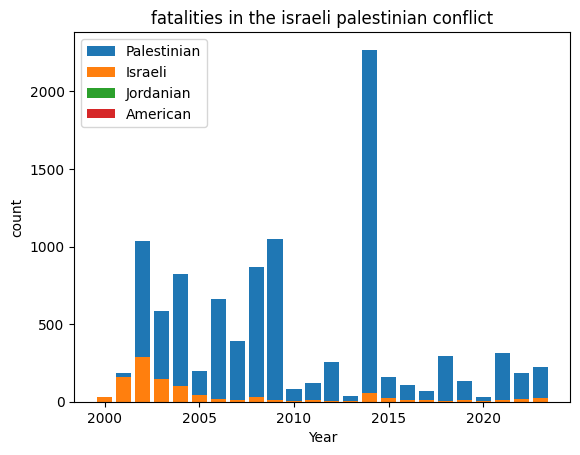

In [6]:
print_bar(citizens_killed, "fatalities in the israeli palestinian conflict")

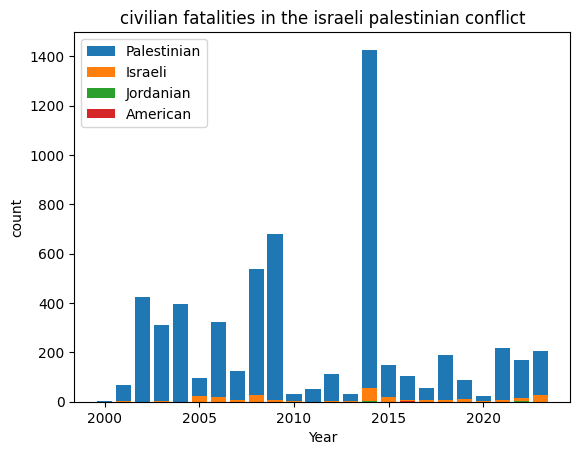

In [7]:
print_bar(citizens_killed_civilian, "civilian fatalities in the israeli palestinian conflict")

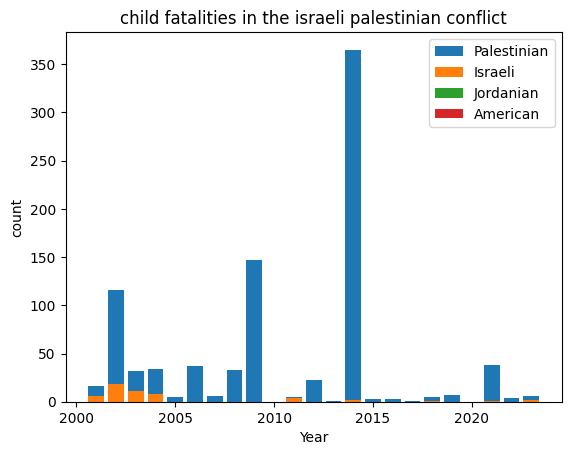

In [8]:
print_bar(number_children_killed, "child fatalities in the israeli palestinian conflict")

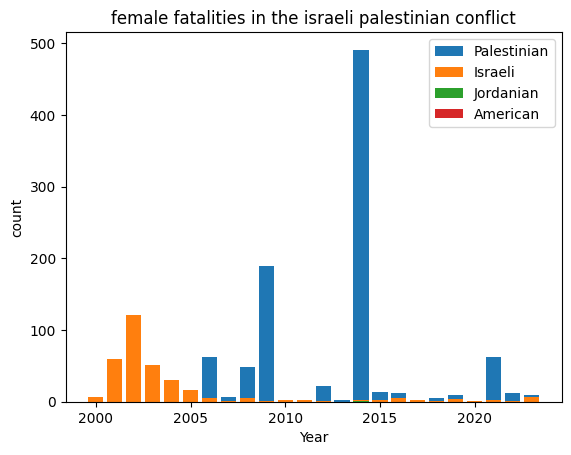

In [9]:
print_bar(citizens_female_killed, "female fatalities in the israeli palestinian conflict")

In [10]:
!pip install geopandas

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


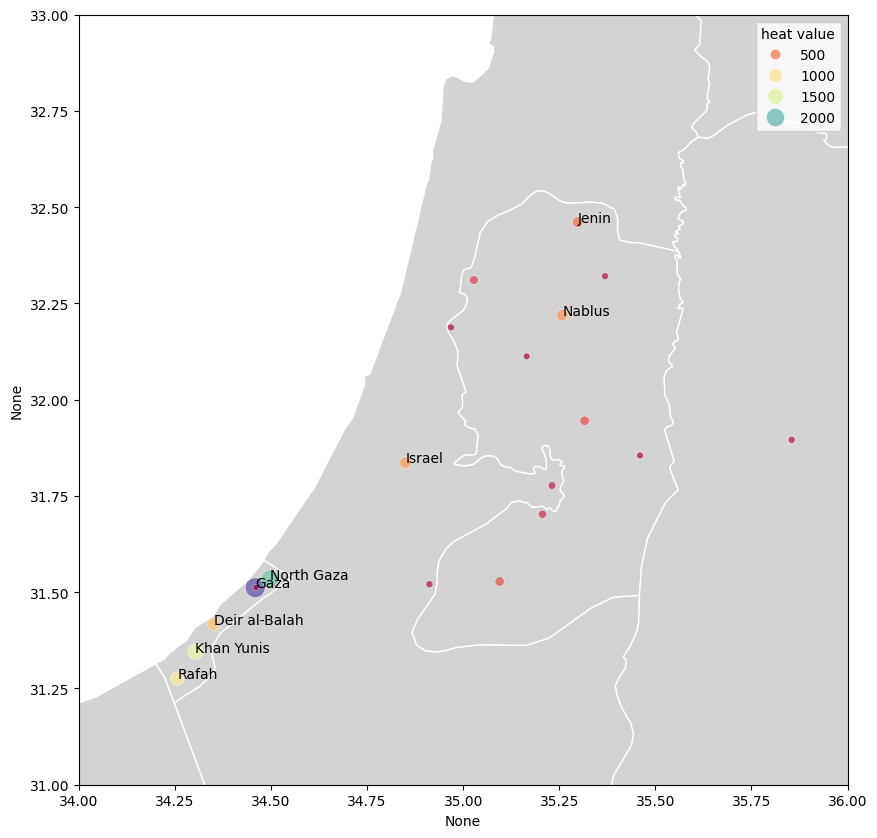

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制底图
fig, ax = plt.subplots(figsize=(10, 10))
base = gpd.read_file("ne_10m_admin_0_countries_chn/ne_10m_admin_0_countries_chn.shp")
base.plot(ax=ax, color="lightgray", edgecolor="white")
# 设置横纵轴范围
plt.xlim(34, 36)
plt.ylim(31, 33)

# 加载地理数据
map_data = gpd.read_file("POINT/POINT.shp")
data = df.groupby("event_location_district")["name"].count().reset_index()
# 将地理数据和数据框进行空间连接
merged_data = map_data.merge(data, left_on="city", right_on="event_location_district", how="left")
merged_data['heat value'] = merged_data['name']
cmap = sns.color_palette("Spectral", as_cmap=True)
# 绘制散点图
sns.scatterplot(data=merged_data, 
                x=merged_data.geometry.x, 
                y=merged_data.geometry.y,
                hue='heat value', palette=cmap, size='heat value', sizes=(20, 200), alpha=0.7)
# 添加地名注释
for i in range(len(merged_data)):
    if merged_data['name'][i] > 500:
        plt.annotate(merged_data['city'][i], (merged_data['geometry'][i].x, merged_data['geometry'][i].y))
# 显示图形
plt.show()

# 如何绘制地理位置底图
- 从 https://www.naturalearthdata.com 下载符合要求的底图（即 ne_10m_admin_0_countries_chn 目录）
- 切割经纬度到需要聚焦的范围
- 在 https://geojson.io/ 对自己关注的坐标进行进行标注，导出（即 POINT 目录）
- 编码绘制

In [12]:
# 在上述第三步标注地理位置中，需要确定都应该标注哪些地点，使用 unique 去梳理
df['event_location_district'].unique()

array(['Tulkarm', 'Jenin', 'Jericho', 'Gaza', 'Hebron', 'Tubas',
       'Ramallah and al-Bira', 'East Jerusalem', 'Nablus', 'Israel',
       'al-Quds', 'Bethlehem', 'Khan Yunis', 'Deir al-Balah',
       'North Gaza', 'Rafah', 'Qalqiliya', 'Salfit', 'Gaza Strip',
       'Gush Katif'], dtype=object)

# 描述信息的词云

In [13]:
!pip install wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


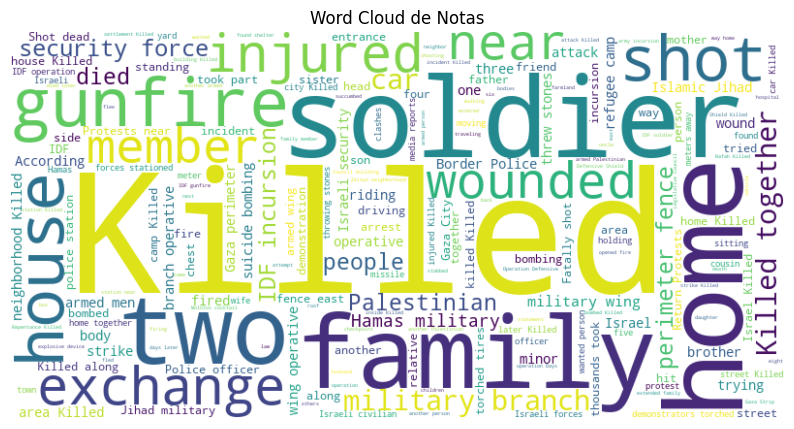

In [18]:
from wordcloud import WordCloud
#Word Clouds Notes
# Crear un word cloud con las notas
notes = ' '.join(df['notes'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(notes)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Notas')
plt.show()

# 凶手

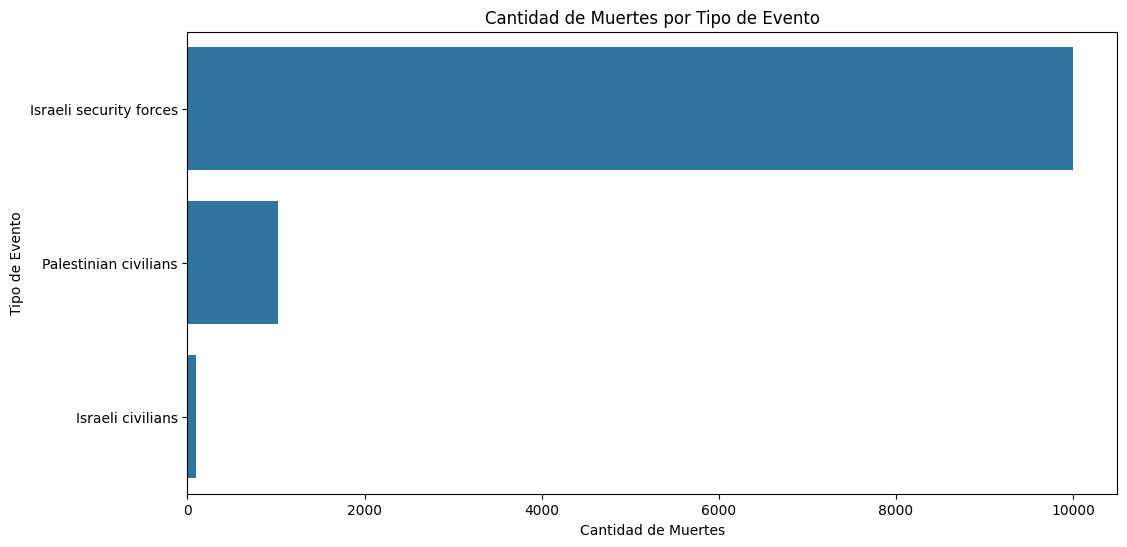

In [15]:
muertes_por_tipo = df.groupby('killed_by')['name'].count().reset_index()
muertes_por_tipo = muertes_por_tipo.rename(columns={'name': 'muertes'})
muertes_por_tipo = muertes_por_tipo.sort_values(by='muertes', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=muertes_por_tipo, x='muertes', y='killed_by')
plt.title('Cantidad de Muertes por Tipo de Evento')
plt.xlabel('Cantidad de Muertes')
plt.ylabel('Tipo de Evento')
plt.show()

# 凶器

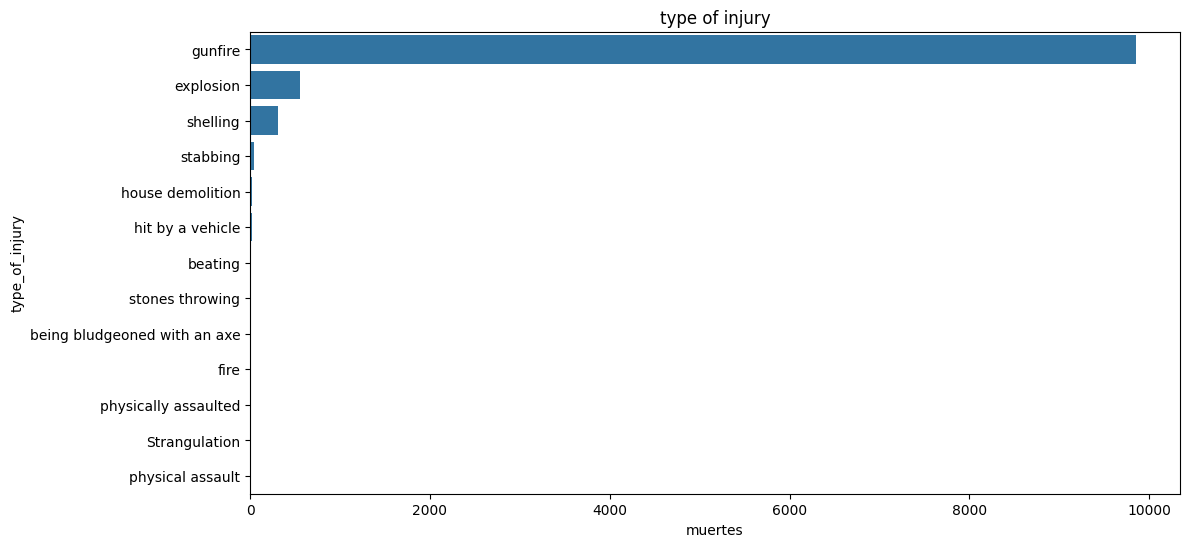

In [16]:
type_of_injury_tipo = df.groupby('type_of_injury')['name'].count().reset_index()
type_of_injury_tipo = type_of_injury_tipo.rename(columns={'name': 'muertes'})
type_of_injury_tipo = type_of_injury_tipo.sort_values(by='muertes', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=type_of_injury_tipo, x='muertes', y='type_of_injury')

plt.title('type of injury')
plt.show()

# 死亡总人口

<Axes: xlabel='citizenship', ylabel='Count'>

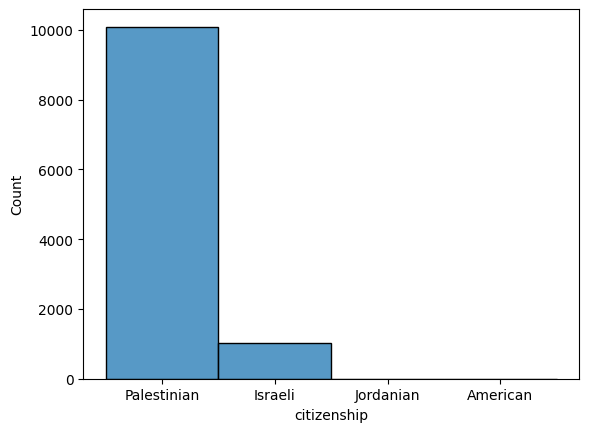

In [17]:
sns.histplot(df, x="citizenship")

# 愿世界和平